In [66]:
#Importing the required libraries
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error

In [4]:
#loading the data
df_tickets = pd.read_csv('/home/stush/Git/traffic_jam_Nairobi/train_revised.csv', low_memory=False)
df_tickets.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [47]:
len(df_tickets)

51645

In [48]:
#The data is a list of tickest but we need to get the number of tickets from one ride. eg ride_id 5778
len(df_tickets.loc[df_tickets['ride_id']==5778])

31

In [19]:
df_tickets.head()

,ride_id,seat_number,payment_method,payment_receipt,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,1442,15A,Mpesa,UZUEHCBUSO,17-10-17,7:15,Migori,Nairobi,Bus,49
1,5437,14A,Mpesa,TIHLBUSGTE,19-11-17,7:12,Migori,Nairobi,Bus,49
2,5710,8B,Mpesa,EQX8Q5G19O,26-11-17,7:05,Keroka,Nairobi,Bus,49
3,5777,19A,Mpesa,SGP18CL0ME,27-11-17,7:10,Homa Bay,Nairobi,Bus,49
4,5778,11A,Mpesa,BM97HFRGL9,27-11-17,7:12,Migori,Nairobi,Bus,49


In [23]:
df_new_tickets = df_tickets.drop(['seat_number','payment_method','payment_receipt','travel_to'],axis = 1)
df_new_tickets.head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,17-10-17,7:15,Migori,Bus,49
1,5437,19-11-17,7:12,Migori,Bus,49
2,5710,26-11-17,7:05,Keroka,Bus,49
3,5777,27-11-17,7:10,Homa Bay,Bus,49
4,5778,27-11-17,7:12,Migori,Bus,49


In [25]:
df_new_tickets.drop_duplicates(inplace=True)
df_new_tickets.count()

ride_id         6249
travel_date     6249
travel_time     6249
travel_from     6249
car_type        6249
max_capacity    6249
dtype: int64

In [88]:
df_combined = pd.merge(group_by_ride_id,df_new_tickets,on='ride_id',how = 'left')
df_combined.head()

,ride_id,num_tickets,travel_date,travel_time,travel_from,car_type,max_capacity
0,1442,1,17-10-17,7:15,Migori,Bus,49
1,5437,1,19-11-17,7:12,Migori,Bus,49
2,5710,1,26-11-17,7:05,Keroka,Bus,49
3,5777,5,27-11-17,7:10,Homa Bay,Bus,49
4,5778,31,27-11-17,7:12,Migori,Bus,49


In [44]:
print(len(df_combined))


6249


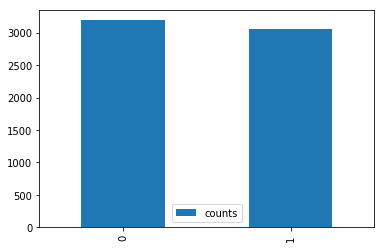

In [46]:
df_combined.groupby(['car_type']).size().to_frame(name='counts').reset_index().plot(kind='bar')

In [42]:
df_combined.groupby(['travel_from']).size().to_frame(name='counts').reset_index()


,travel_from,counts
0,Awendo,185
1,Homa Bay,356
2,Kehancha,172
3,Kendu Bay,1
4,Keroka,312
5,Keumbu,20
6,Kijauri,556
7,Kisii,3020
8,Mbita,21
9,Migori,386


In [71]:
df_combined['max_capacity'].value_counts()

49    3189
11    3060
Name: max_capacity, dtype: int64

In [75]:
df_combined.drop(['ride_id'], axis=1, inplace=True) 

In [76]:
df_combined.head()

,num_tickets,travel_date,travel_time,travel_from,car_type,max_capacity
0,1,17-10-17,7:15,Migori,Bus,49
1,1,19-11-17,7:12,Migori,Bus,49
2,1,26-11-17,7:05,Keroka,Bus,49
3,5,27-11-17,7:10,Homa Bay,Bus,49
4,31,27-11-17,7:12,Migori,Bus,49


In [89]:
df_combined["travel_date"] = pd.to_datetime(df_combined["travel_date"],infer_datetime_format=True)

In [90]:
df_combined[['t_year','t_month']] = df_combined.travel_date.apply(lambda x: pd.Series(x.strftime("%Y,%m").split(",")))

In [92]:
df_combined["travel_date"] = df_combined["travel_date"].dt.dayofweek #change the full date to day of week

In [94]:
df_new_set = df_combined
df_new_set.head()

,ride_id,num_tickets,travel_date,travel_time,travel_from,car_type,max_capacity,t_year,t_month
0,1442,1,1,7:15,Migori,Bus,49,2017,10
1,5437,1,6,7:12,Migori,Bus,49,2017,11
2,5710,1,6,7:05,Keroka,Bus,49,2017,11
3,5777,5,0,7:10,Homa Bay,Bus,49,2017,11
4,5778,31,0,7:12,Migori,Bus,49,2017,11


In [97]:
df_new_set.drop(['ride_id'],axis = 1).head()

,num_tickets,travel_date,travel_time,travel_from,car_type,max_capacity,t_year,t_month
0,1,1,7:15,Migori,Bus,49,2017,10
1,1,6,7:12,Migori,Bus,49,2017,11
2,1,6,7:05,Keroka,Bus,49,2017,11
3,5,0,7:10,Homa Bay,Bus,49,2017,11
4,31,0,7:12,Migori,Bus,49,2017,11


In [103]:
df_new_set['travel_time'] = pd.to_datetime(df_new_set['travel_time'],infer_datetime_format=True)
df_new_set.head()

,ride_id,num_tickets,travel_date,travel_time,travel_from,car_type,max_capacity,t_year,t_month
0,1442,1,1,2018-11-25 07:15:00,Migori,Bus,49,2017,10
1,5437,1,6,2018-11-25 07:12:00,Migori,Bus,49,2017,11
2,5710,1,6,2018-11-25 07:05:00,Keroka,Bus,49,2017,11
3,5777,5,0,2018-11-25 07:10:00,Homa Bay,Bus,49,2017,11
4,5778,31,0,2018-11-25 07:12:00,Migori,Bus,49,2017,11


In [120]:
df_combined[['hour_dept','mins_dept','AM/PM']] = df_new_set.travel_time.apply(lambda x: pd.Series(x.strftime("%-H,%M,%p").split(",")))
df_processed = df_combined
df_processed.head()

,ride_id,num_tickets,travel_date,travel_time,travel_from,car_type,max_capacity,t_year,t_month,hour_dept,mins_dept,AM/PM,day_bin
0,1442,1,1,2018-11-25 07:15:00,Migori,Bus,49,2017,10,7,15,AM,morning
1,5437,1,6,2018-11-25 07:12:00,Migori,Bus,49,2017,11,7,12,AM,morning
2,5710,1,6,2018-11-25 07:05:00,Keroka,Bus,49,2017,11,7,05,AM,morning
3,5777,5,0,2018-11-25 07:10:00,Homa Bay,Bus,49,2017,11,7,10,AM,morning
4,5778,31,0,2018-11-25 07:12:00,Migori,Bus,49,2017,11,7,12,AM,morning


In [125]:
df_processed['day_bin'].value_counts()

morning    5963
evening     225
night        61
Name: day_bin, dtype: int64

In [126]:
df_model=df_processed.drop(['ride_id','travel_time','mins_dept'],axis = 1)

In [128]:
df_model.head()

,num_tickets,travel_date,travel_from,car_type,max_capacity,t_year,t_month,hour_dept,AM/PM,day_bin
0,1,1,Migori,Bus,49,2017,10,7,AM,morning
1,1,6,Migori,Bus,49,2017,11,7,AM,morning
2,1,6,Keroka,Bus,49,2017,11,7,AM,morning
3,5,0,Homa Bay,Bus,49,2017,11,7,AM,morning
4,31,0,Migori,Bus,49,2017,11,7,AM,morning


In [129]:
df_model["travel_from"] = pd.Categorical(df_model["travel_from"])
travel_from_categories = df_model.travel_from.cat.categories
df_model["travel_from"] = df_model.travel_from.cat.codes

In [132]:
df_model["car_type"] = pd.Categorical(df_model["car_type"])
car_categories = df_model.car_type.cat.categories
df_model["car_type"] = df_model.car_type.cat.codes

In [134]:
df_model["t_year"] = pd.Categorical(df_model["t_year"])
year_categories = df_model.t_year.cat.categories
df_model["t_year"] = df_model.t_year.cat.codes

In [137]:
df_model["max_capacity"] = pd.Categorical(df_model["max_capacity"])
capacity_categories = df_model.max_capacity.cat.categories
df_model["max_capacity"] = df_model.max_capacity.cat.codes

In [136]:
df_model["day_bin"] = pd.Categorical(df_model["day_bin"])
daytime_categories = df_model.day_bin.cat.categories
df_model["day_bin"] = df_model.day_bin.cat.codes

In [138]:
df_model.head()

,num_tickets,travel_date,travel_from,car_type,max_capacity,t_year,t_month,hour_dept,AM/PM,day_bin
0,1,1,9,0,1,0,10,7,AM,1
1,1,6,9,0,1,0,11,7,AM,1
2,1,6,4,0,1,0,11,7,AM,1
3,5,0,1,0,1,0,11,7,AM,1
4,31,0,9,0,1,0,11,7,AM,1


In [139]:
df_final = df_model.drop(['AM/PM'],axis = 1)
df_final.head()

,num_tickets,travel_date,travel_from,car_type,max_capacity,t_year,t_month,hour_dept,day_bin
0,1,1,9,0,1,0,10,7,1
1,1,6,9,0,1,0,11,7,1
2,1,6,4,0,1,0,11,7,1
3,5,0,1,0,1,0,11,7,1
4,31,0,9,0,1,0,11,7,1


In [155]:
x = df_final.drop(['num_tickets','day_bin'],axis = 1)
y = df_final.num_tickets

In [189]:
x.head()

,travel_date,travel_from,car_type,max_capacity,t_year,t_month,hour_dept
0,1,9,0,1,0,10,7
1,6,9,0,1,0,11,7
2,6,4,0,1,0,11,7
3,0,1,0,1,0,11,7
4,0,9,0,1,0,11,7


In [156]:
model = RandomForestRegressor(n_estimators=100, criterion="mae", n_jobs=-1)

In [157]:
model.fit(x,y)

RandomForestRegressor(bootstrap=True, criterion='mae', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=-1,
           oob_score=False, random_state=None, verbose=0, warm_start=False)

In [158]:
preds_train_set = model.predict(x)

In [159]:
print (mean_absolute_error(preds_train_set,y))

3.287189950392063


In [150]:
#Prediction for test

In [190]:
df_test = pd.read_csv('/home/stush/Downloads/test_questions.csv', low_memory=False)

In [191]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11


In [192]:
df_test.drop(['travel_to'],axis=1).head()

,ride_id,travel_date,travel_time,travel_from,car_type,max_capacity
0,247,2018-05-07,07:06,Kisii,Bus,49
1,256,2018-05-06,11:08,Kisii,shuttle,11
2,275,2018-05-04,05:00,Kisii,shuttle,11
3,285,2018-05-04,09:10,Kisii,shuttle,11
4,286,2018-05-04,09:20,Kisii,shuttle,11


In [193]:
df_test['travel_date'] = pd.to_datetime(df_test['travel_date'],infer_datetime_format=True)
df_test[['t_year','t_month']] = df_test.travel_date.apply(lambda x: pd.Series(x.strftime("%Y,%m").split(",")))
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,t_year,t_month
0,247,2018-05-07,07:06,Kisii,Nairobi,Bus,49,2018,05
1,256,2018-05-06,11:08,Kisii,Nairobi,shuttle,11,2018,05
2,275,2018-05-04,05:00,Kisii,Nairobi,shuttle,11,2018,05
3,285,2018-05-04,09:10,Kisii,Nairobi,shuttle,11,2018,05
4,286,2018-05-04,09:20,Kisii,Nairobi,shuttle,11,2018,05


In [194]:
df_test['travel_time'] = pd.to_datetime(df_test['travel_time'],infer_datetime_format=True)
df_test[['hour_dept']] = df_test.travel_time.apply(lambda x: pd.Series(x.strftime("%-H").split(",")))
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,t_year,t_month,hour_dept
0,247,2018-05-07,2018-11-25 07:06:00,Kisii,Nairobi,Bus,49,2018,05,7
1,256,2018-05-06,2018-11-25 11:08:00,Kisii,Nairobi,shuttle,11,2018,05,11
2,275,2018-05-04,2018-11-25 05:00:00,Kisii,Nairobi,shuttle,11,2018,05,5
3,285,2018-05-04,2018-11-25 09:10:00,Kisii,Nairobi,shuttle,11,2018,05,9
4,286,2018-05-04,2018-11-25 09:20:00,Kisii,Nairobi,shuttle,11,2018,05,9


In [195]:
df_test["travel_date"] = df_test["travel_date"].dt.dayofweek

In [197]:
df_test.head()

,ride_id,travel_date,travel_time,travel_from,travel_to,car_type,max_capacity,t_year,t_month,hour_dept
0,247,0,2018-11-25 07:06:00,Kisii,Nairobi,Bus,49,2018,05,7
1,256,6,2018-11-25 11:08:00,Kisii,Nairobi,shuttle,11,2018,05,11
2,275,4,2018-11-25 05:00:00,Kisii,Nairobi,shuttle,11,2018,05,5
3,285,4,2018-11-25 09:10:00,Kisii,Nairobi,shuttle,11,2018,05,9
4,286,4,2018-11-25 09:20:00,Kisii,Nairobi,shuttle,11,2018,05,9


In [198]:
df_test_final=df_test.drop(['ride_id','travel_time'],axis = 1)

In [199]:
df_test_final.head()

,travel_date,travel_from,travel_to,car_type,max_capacity,t_year,t_month,hour_dept
0,0,Kisii,Nairobi,Bus,49,2018,05,7
1,6,Kisii,Nairobi,shuttle,11,2018,05,11
2,4,Kisii,Nairobi,shuttle,11,2018,05,5
3,4,Kisii,Nairobi,shuttle,11,2018,05,9
4,4,Kisii,Nairobi,shuttle,11,2018,05,9


In [200]:
df_test_final["car_type"] = pd.Categorical(df_test_final["car_type"])
car_categories_test = df_test_final.car_type.cat.categories
df_test_final["car_type"] = df_test_final.car_type.cat.codes

In [201]:
df_test_final["t_year"] = pd.Categorical(df_test_final["t_year"])
year_categories_test = df_test_final.t_year.cat.categories
df_test_final["t_year"] = df_test_final.t_year.cat.codes

In [202]:
df_test_final["max_capacity"] = pd.Categorical(df_test_final["max_capacity"])
capacity_categories_test = df_test_final.max_capacity.cat.categories
df_test_final["max_capacity"] = df_test_final.max_capacity.cat.codes

In [203]:
df_test_final["travel_from"] = pd.Categorical(df_test_final["travel_from"])
travel_from_categories_test = df_test_final.travel_from.cat.categories
df_test_final["travel_from"] = df_test_final.travel_from.cat.codes

In [207]:
x_test = df_test_final.drop(['travel_to'],axis = 1)

In [208]:
test_predictions = model.predict(x_test)

In [210]:
f = {'ride_id': df_test["ride_id"], 'number_of_ticket': test_predictions}
df_predictions = pd.DataFrame(data=f)
df_predictions = df_predictions[['ride_id','number_of_ticket']]

In [211]:
df_predictions.head()

,ride_id,number_of_ticket
0,247,2.330
1,256,2.855
2,275,1.350
3,285,3.195
4,286,3.195


In [212]:
df_predictions.to_csv('/home/stush/Desktop/zindi_prediction_test.csv', index=False) #save to csv file